<a href="https://colab.research.google.com/github/sweety-sweety/Python_Arabov/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

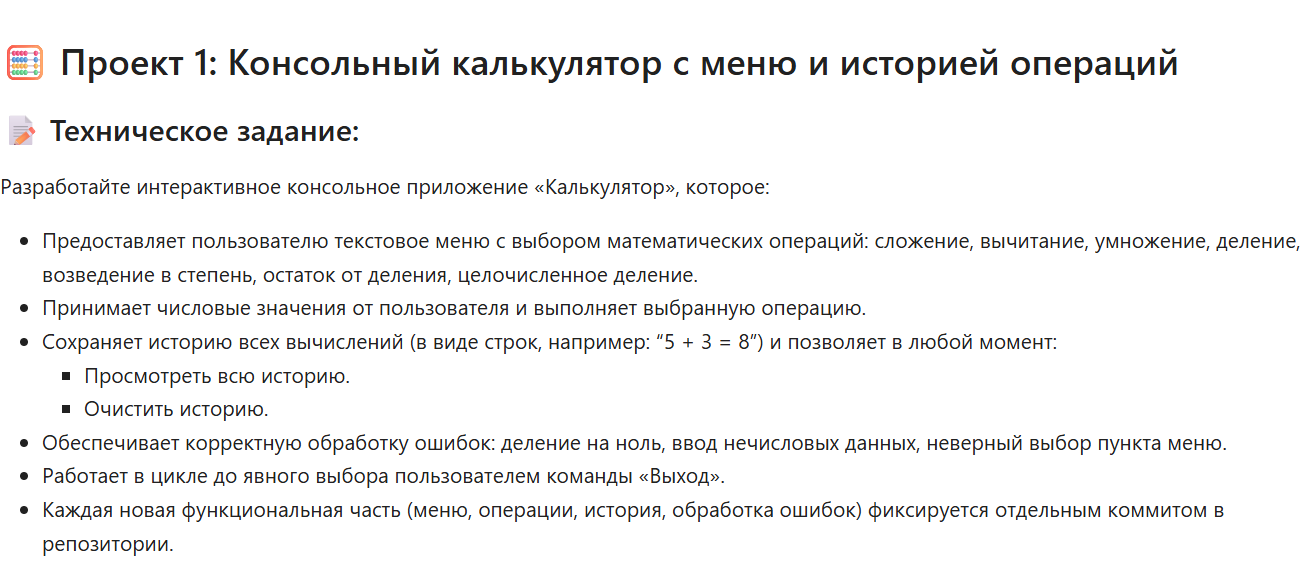

In [1]:
# calculator.py

def show_menu():
    print("\n===== Калькулятор =====")
    print("1. Сложение")
    print("2. Вычитание")
    print("3. Умножение")
    print("4. Деление")
    print("5. Возведение в степень")
    print("6. Остаток от деления")
    print("7. Целочисленное деление")
    print("8. Показать историю")
    print("9. Очистить историю")
    print("0. Выход")


def get_numbers():
    """Запрашивает у пользователя два числа"""
    while True:
        try:
            a = float(input("Введите первое число: "))
            b = float(input("Введите второе число: "))
            return a, b
        except ValueError:
            print("Ошибка: нужно ввести числа!")


def main():
    history = []

    while True:
        show_menu()
        choice = input("Выберите пункт меню: ")

        if choice == "1":
            a, b = get_numbers()
            result = a + b
            record = f"{a} + {b} = {result}"
            print(record)
            history.append(record)

        elif choice == "2":
            a, b = get_numbers()
            result = a - b
            record = f"{a} - {b} = {result}"
            print(record)
            history.append(record)

        elif choice == "3":
            a, b = get_numbers()
            result = a * b
            record = f"{a} * {b} = {result}"
            print(record)
            history.append(record)

        elif choice == "4":
            a, b = get_numbers()
            try:
                result = a / b
                record = f"{a} / {b} = {result}"
            except ZeroDivisionError:
                record = f"Ошибка: деление {a} / {b} на ноль!"
            print(record)
            history.append(record)

        elif choice == "5":
            a, b = get_numbers()
            result = a ** b
            record = f"{a} ^ {b} = {result}"
            print(record)
            history.append(record)

        elif choice == "6":
            a, b = get_numbers()
            try:
                result = a % b
                record = f"{a} % {b} = {result}"
            except ZeroDivisionError:
                record = f"Ошибка: остаток от деления {a} % {b} на ноль!"
            print(record)
            history.append(record)

        elif choice == "7":
            a, b = get_numbers()
            try:
                result = a // b
                record = f"{a} // {b} = {result}"
            except ZeroDivisionError:
                record = f"Ошибка: целочисленное деление {a} // {b} на ноль!"
            print(record)
            history.append(record)

        elif choice == "8":
            if history:
                print("\nИстория вычислений:")
                for h in history:
                    print(h)
            else:
                print("История пуста.")

        elif choice == "9":
            history.clear()
            print("История очищена.")

        elif choice == "0":
            print("Выход из программы...")
            break

        else:
            print("Ошибка: нет такого пункта меню!")


if __name__ == "__main__":
    main()



===== Калькулятор =====
1. Сложение
2. Вычитание
3. Умножение
4. Деление
5. Возведение в степень
6. Остаток от деления
7. Целочисленное деление
8. Показать историю
9. Очистить историю
0. Выход
Выберите пункт меню: 1
Введите первое число: 12
Введите второе число: 32
12.0 + 32.0 = 44.0

===== Калькулятор =====
1. Сложение
2. Вычитание
3. Умножение
4. Деление
5. Возведение в степень
6. Остаток от деления
7. Целочисленное деление
8. Показать историю
9. Очистить историю
0. Выход
Выберите пункт меню: 2
Введите первое число: 3
Введите второе число: 6
3.0 - 6.0 = -3.0

===== Калькулятор =====
1. Сложение
2. Вычитание
3. Умножение
4. Деление
5. Возведение в степень
6. Остаток от деления
7. Целочисленное деление
8. Показать историю
9. Очистить историю
0. Выход
Выберите пункт меню: 8

История вычислений:
12.0 + 32.0 = 44.0
3.0 - 6.0 = -3.0

===== Калькулятор =====
1. Сложение
2. Вычитание
3. Умножение
4. Деление
5. Возведение в степень
6. Остаток от деления
7. Целочисленное деление
8. Показать и

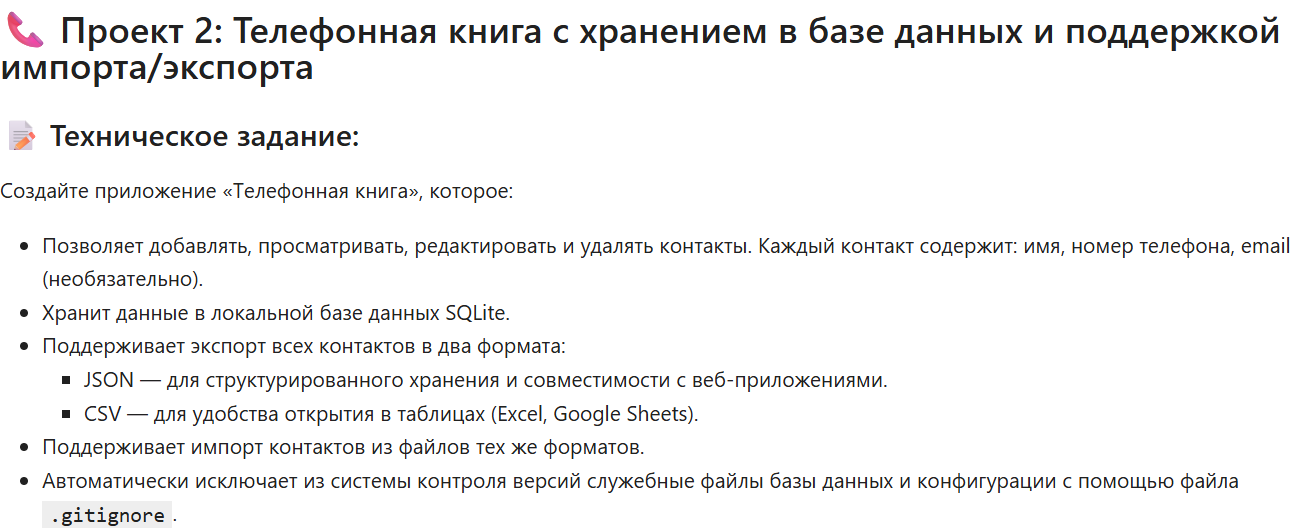

In [4]:
import sqlite3
import csv
import json
import os
import re
from typing import Optional

DB_FILENAME = "phonebook.db"

EMAIL_RE = re.compile(r"^[^@]+@[^@]+\.[^@]+$")


def get_conn():
    return sqlite3.connect(DB_FILENAME)


def init_db():
    with get_conn() as conn:
        conn.execute(
            """
            CREATE TABLE IF NOT EXISTS contacts (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                name TEXT NOT NULL,
                phone TEXT NOT NULL,
                email TEXT
            )
            """
        )
        conn.commit()


def validate_email(email: Optional[str]) -> Optional[str]:
    if email is None or email.strip() == "":
        return None
    email = email.strip()
    if not EMAIL_RE.match(email):
        raise ValueError("Неверный формат email.")
    return email


def add_contact(name: str, phone: str, email: Optional[str] = None) -> int:
    email = validate_email(email)
    with get_conn() as conn:
        cur = conn.execute(
            "INSERT INTO contacts (name, phone, email) VALUES (?, ?, ?)",
            (name.strip(), phone.strip(), email),
        )
        conn.commit()
        return cur.lastrowid


def list_contacts():
    with get_conn() as conn:
        cur = conn.execute("SELECT id, name, phone, email FROM contacts ORDER BY name")
        rows = cur.fetchall()
    if not rows:
        print("Контакты отсутствуют.")
        return
    print(f"\n{'ID':<4} {'Имя':<30} {'Телефон':<20} {'Email'}")
    print("-" * 70)
    for r in rows:
        id_, name, phone, email = r
        print(f"{id_:<4} {name:<30} {phone:<20} {email or ''}")
    print()


def get_contact_by_id(contact_id: int):
    with get_conn() as conn:
        cur = conn.execute("SELECT id, name, phone, email FROM contacts WHERE id = ?", (contact_id,))
        return cur.fetchone()


def update_contact(contact_id: int, name: str, phone: str, email: Optional[str]):
    email = validate_email(email)
    with get_conn() as conn:
        conn.execute(
            "UPDATE contacts SET name = ?, phone = ?, email = ? WHERE id = ?",
            (name.strip(), phone.strip(), email, contact_id),
        )
        conn.commit()


def delete_contact(contact_id: int):
    with get_conn() as conn:
        conn.execute("DELETE FROM contacts WHERE id = ?", (contact_id,))
        conn.commit()


def export_json(filepath: str):
    with get_conn() as conn:
        cur = conn.execute("SELECT id, name, phone, email FROM contacts ORDER BY id")
        rows = cur.fetchall()
    data = []
    for r in rows:
        id_, name, phone, email = r
        data.append({"id": id_, "name": name, "phone": phone, "email": email})
    with open(filepath, "w", encoding="utf-8") as f:
        json.dump(data, f, ensure_ascii=False, indent=2)
    print(f"Экспортировано {len(data)} контактов в {filepath}")


def export_csv(filepath: str):
    with get_conn() as conn:
        cur = conn.execute("SELECT id, name, phone, email FROM contacts ORDER BY id")
        rows = cur.fetchall()
    with open(filepath, "w", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["id", "name", "phone", "email"])
        for r in rows:
            writer.writerow(r)
    print(f"Экспортировано {len(rows)} контактов в {filepath}")


def import_json(filepath: str, skip_duplicates: bool = True):
    if not os.path.exists(filepath):
        print("Файл не найден.")
        return
    with open(filepath, "r", encoding="utf-8") as f:
        data = json.load(f)
    added = 0
    with get_conn() as conn:
        for item in data:
            name = item.get("name")
            phone = item.get("phone")
            email = item.get("email")
            if not name or not phone:
                continue
            if skip_duplicates:
                cur = conn.execute(
                    "SELECT id FROM contacts WHERE name = ? AND phone = ?",
                    (name.strip(), phone.strip()),
                )
                if cur.fetchone():
                    continue
            try:
                email = validate_email(email)
            except ValueError:
                email = None
            conn.execute("INSERT INTO contacts (name, phone, email) VALUES (?, ?, ?)", (name.strip(), phone.strip(), email))
            added += 1
        conn.commit()
    print(f"Импортировано {added} контактов из {filepath}")


def import_csv(filepath: str, skip_duplicates: bool = True):
    if not os.path.exists(filepath):
        print("Файл не найден.")
        return
    added = 0
    with open(filepath, "r", encoding="utf-8") as f:
        reader = csv.DictReader(f)
        with get_conn() as conn:
            for row in reader:
                name = row.get("name") or row.get("Имя") or row.get("Name")
                phone = row.get("phone") or row.get("Телефон") or row.get("Phone")
                email = row.get("email") or row.get("Email")
                if not name or not phone:
                    continue
                if skip_duplicates:
                    cur = conn.execute("SELECT id FROM contacts WHERE name = ? AND phone = ?", (name.strip(), phone.strip()))
                    if cur.fetchone():
                        continue
                try:
                    email = validate_email(email)
                except ValueError:
                    email = None
                conn.execute("INSERT INTO contacts (name, phone, email) VALUES (?, ?, ?)", (name.strip(), phone.strip(), email))
                added += 1
            conn.commit()
    print(f"Импортировано {added} контактов из {filepath}")


def prompt_non_empty(prompt_text: str, default: Optional[str] = None) -> str:
    while True:
        val = input(f"{prompt_text}" + (f" [{default}]" if default else "") + ": ")
        if val.strip() == "" and default is not None:
            return default
        if val.strip() == "":
            print("Поле не должно быть пустым.")
        else:
            return val.strip()


def main_menu():
    print("""
===== Телефонная книга =====
1. Добавить контакт
2. Показать все контакты
3. Просмотреть контакт по ID
4. Редактировать контакт
5. Удалить контакт
6. Экспорт в JSON
7. Экспорт в CSV
8. Импорт из JSON
9. Импорт из CSV
0. Выход
""")


def main():
    init_db()
    while True:
        main_menu()
        choice = input("Выберите пункт: ").strip()
        try:
            if choice == "1":
                name = prompt_non_empty("Имя")
                phone = prompt_non_empty("Телефон")
                email = input("Email (необязательно): ").strip() or None
                try:
                    cid = add_contact(name, phone, email)
                    print(f"Контакт добавлен с ID = {cid}")
                except ValueError as e:
                    print("Ошибка:", e)

            elif choice == "2":
                list_contacts()

            elif choice == "3":
                cid = input("Введите ID контакта: ").strip()
                if not cid.isdigit():
                    print("Неверный ID")
                    continue
                rec = get_contact_by_id(int(cid))
                if not rec:
                    print("Контакт не найден.")
                else:
                    id_, name, phone, email = rec
                    print(f"\nID: {id_}\nИмя: {name}\nТелефон: {phone}\nEmail: {email or ''}\n")

            elif choice == "4":
                cid = input("Введите ID для редактирования: ").strip()
                if not cid.isdigit():
                    print("Неверный ID")
                    continue
                rec = get_contact_by_id(int(cid))
                if not rec:
                    print("Контакт не найден.")
                    continue
                id_, name, phone, email = rec
                print("Оставьте поле пустым, чтобы оставить текущее значение.")
                new_name = input(f"Имя [{name}]: ").strip() or name
                new_phone = input(f"Телефон [{phone}]: ").strip() or phone
                new_email = input(f"Email [{email or ''}]: ").strip() or email
                try:
                    update_contact(id_, new_name, new_phone, new_email)
                    print("Контакт обновлён.")
                except ValueError as e:
                    print("Ошибка:", e)

            elif choice == "5":
                cid = input("Введите ID для удаления: ").strip()
                if not cid.isdigit():
                    print("Неверный ID")
                    continue
                rec = get_contact_by_id(int(cid))
                if not rec:
                    print("Контакт не найден.")
                    continue
                confirm = input(f"Удалить контакт {rec[1]} (ID={rec[0]})? (y/N): ").strip().lower()
                if confirm == "y":
                    delete_contact(int(cid))
                    print("Контакт удалён.")
                else:
                    print("Отмена.")

            elif choice == "6":
                path = input("Путь для JSON (по умолчанию phonebook_export.json): ").strip() or "phonebook_export.json"
                export_json(path)

            elif choice == "7":
                path = input("Путь для CSV (по умолчанию phonebook_export.csv): ").strip() or "phonebook_export.csv"
                export_csv(path)

            elif choice == "8":
                path = input("Путь JSON для импорта: ").strip()
                if path == "":
                    print("Путь не указан.")
                else:
                    import_json(path)

            elif choice == "9":
                path = input("Путь CSV для импорта: ").strip()
                if path == "":
                    print("Путь не указан.")
                else:
                    import_csv(path)

            elif choice == "0":
                print("Выход...")
                break

            else:
                print("Неправильный пункт меню. Попробуйте ещё раз.")
        except Exception as exc:
            # общий обработчик — чтобы приложение не падало на неожиданных ошибках
            print("Произошла ошибка:", exc)


if __name__ == "__main__":
    main()



===== Телефонная книга =====
1. Добавить контакт
2. Показать все контакты
3. Просмотреть контакт по ID
4. Редактировать контакт
5. Удалить контакт
6. Экспорт в JSON
7. Экспорт в CSV
8. Импорт из JSON
9. Импорт из CSV
0. Выход

Выберите пункт: 1
Имя: Света
Телефон: +79174567184
Email (необязательно): khaybulinas@mail.ru
Контакт добавлен с ID = 1

===== Телефонная книга =====
1. Добавить контакт
2. Показать все контакты
3. Просмотреть контакт по ID
4. Редактировать контакт
5. Удалить контакт
6. Экспорт в JSON
7. Экспорт в CSV
8. Импорт из JSON
9. Импорт из CSV
0. Выход

Выберите пункт: 2

ID   Имя                            Телефон              Email
----------------------------------------------------------------------
1    Света                          +79174567184         khaybulinas@mail.ru


===== Телефонная книга =====
1. Добавить контакт
2. Показать все контакты
3. Просмотреть контакт по ID
4. Редактировать контакт
5. Удалить контакт
6. Экспорт в JSON
7. Экспорт в CSV
8. Импорт 

In [ ]:
# База данных
phonebook.db
*.db

# Python
__pycache__/
*.py[cod]
env/
venv/
.env

# Экспорты и локальные файлы
*.json
*.csv

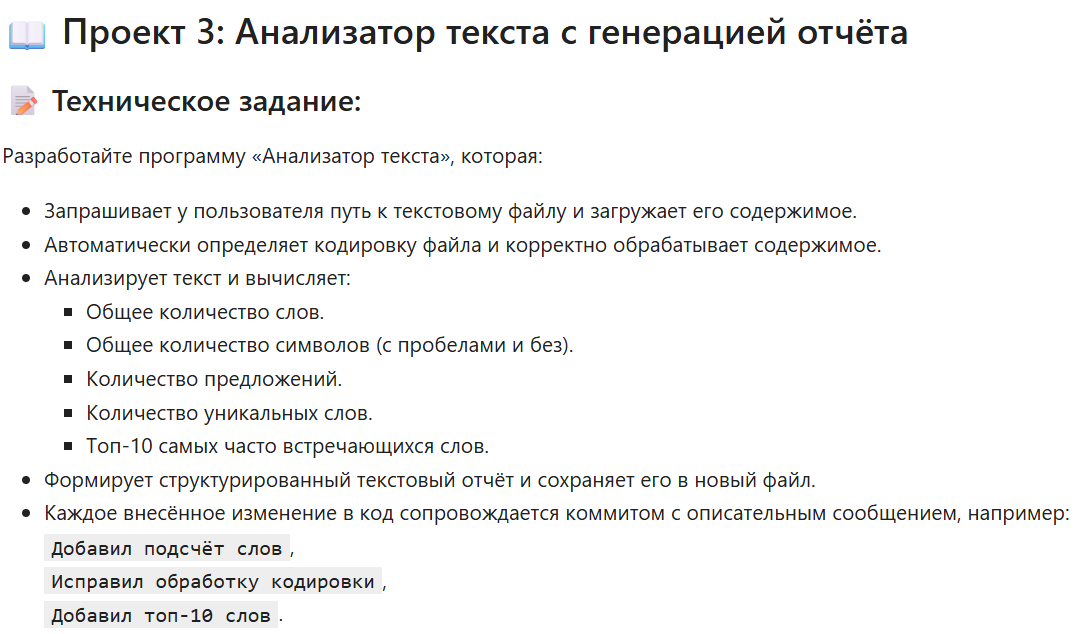

In [2]:
# text_analyzer.py

import chardet
import re
from collections import Counter

def detect_encoding(filepath: str) -> str:
    """Определяет кодировку файла"""
    with open(filepath, "rb") as f:
        raw_data = f.read(100000)  # читаем кусок файла
    result = chardet.detect(raw_data)
    return result["encoding"] or "utf-8"

def load_text(filepath: str) -> str:
    """Загружает текст с правильной кодировкой"""
    encoding = detect_encoding(filepath)
    try:
        with open(filepath, "r", encoding=encoding) as f:
            return f.read()
    except Exception as e:
        raise RuntimeError(f"Ошибка при чтении файла: {e}")

def analyze_text(text: str) -> dict:
    """Выполняет анализ текста"""
    # Убираем двойные пробелы и лишние символы
    cleaned_text = text.strip()

    # Подсчёт символов
    total_chars = len(cleaned_text)
    total_chars_no_spaces = len(cleaned_text.replace(" ", ""))

    # Подсчёт слов
    words = re.findall(r"\b\w+\b", cleaned_text.lower())
    total_words = len(words)

    # Уникальные слова
    unique_words = len(set(words))

    # Подсчёт предложений
    sentences = re.split(r"[.!?]+", cleaned_text)
    sentences = [s.strip() for s in sentences if s.strip()]
    total_sentences = len(sentences)

    # Топ-10 слов
    counter = Counter(words)
    top_words = counter.most_common(10)

    return {
        "total_words": total_words,
        "total_chars": total_chars,
        "total_chars_no_spaces": total_chars_no_spaces,
        "total_sentences": total_sentences,
        "unique_words": unique_words,
        "top_words": top_words,
    }

def save_report(report_path: str, stats: dict):
    """Сохраняет отчёт в файл"""
    with open(report_path, "w", encoding="utf-8") as f:
        f.write("📊 Отчёт по анализу текста\n")
        f.write("="*40 + "\n")
        f.write(f"Всего слов: {stats['total_words']}\n")
        f.write(f"Всего символов (с пробелами): {stats['total_chars']}\n")
        f.write(f"Всего символов (без пробелов): {stats['total_chars_no_spaces']}\n")
        f.write(f"Количество предложений: {stats['total_sentences']}\n")
        f.write(f"Уникальных слов: {stats['unique_words']}\n\n")
        f.write("Топ-10 слов:\n")
        for word, count in stats["top_words"]:
            f.write(f" - {word}: {count}\n")
    print(f"✅ Отчёт сохранён в {report_path}")

def main():
    filepath = input("Введите путь к текстовому файлу: ").strip()
    try:
        text = load_text(filepath)
        stats = analyze_text(text)
        save_report("report.txt", stats)
    except Exception as e:
        print("Ошибка:", e)

if __name__ == "__main__":
    main()


Введите путь к текстовому файлу: /content/test.txt
✅ Отчёт сохранён в report.txt


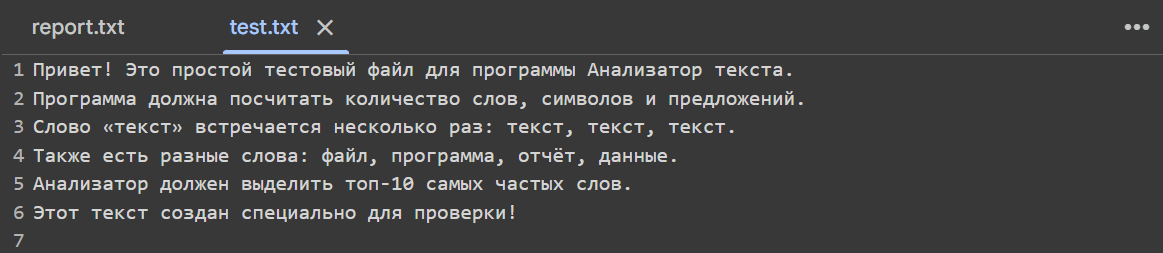

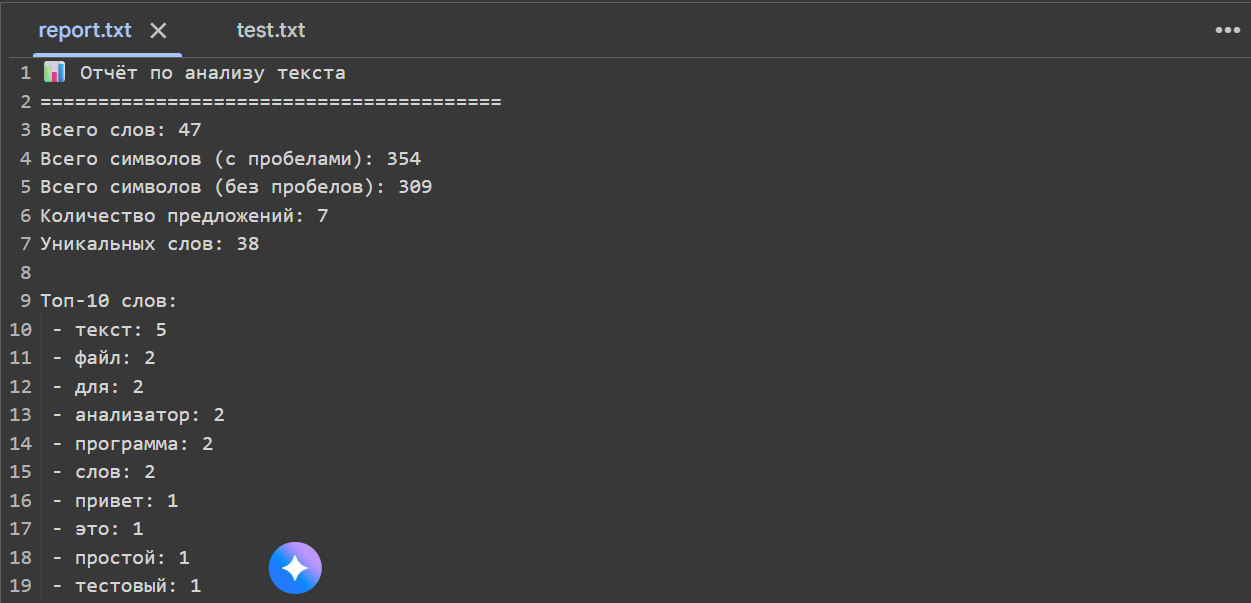

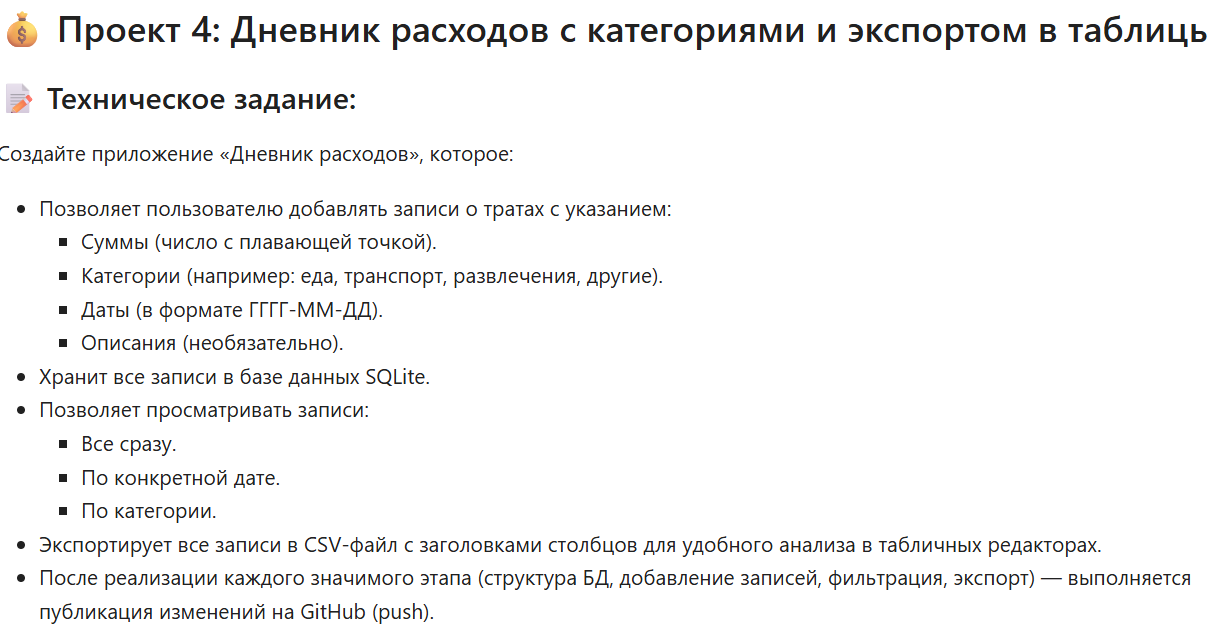

In [5]:
import sqlite3
import csv
import os
from datetime import datetime
from typing import Optional

DB_FILENAME = "expenses.db"
VALID_CATEGORIES = ["еда", "транспорт", "развлечения", "прочее"]  # можно расширять


def get_conn(db_path: Optional[str] = None):
    if db_path:
        return sqlite3.connect(db_path)
    return sqlite3.connect(DB_FILENAME)


def init_db(db_path: Optional[str] = None):
    with get_conn(db_path) as conn:
        conn.execute(
            """
            CREATE TABLE IF NOT EXISTS expenses (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                amount REAL NOT NULL,
                category TEXT NOT NULL,
                date TEXT NOT NULL, -- YYYY-MM-DD
                description TEXT
            )
            """
        )
        conn.commit()


def validate_date(date_str: str) -> str:
    try:
        d = datetime.strptime(date_str, "%Y-%m-%d")
        return d.strftime("%Y-%m-%d")
    except ValueError:
        raise ValueError("Неверный формат даты. Ожидается ГГГГ-ММ-ДД")


def add_expense(amount: float, category: str, date_str: str, description: Optional[str] = None, db_path: Optional[str] = None):
    if category not in VALID_CATEGORIES:
        raise ValueError(f"Неверная категория. Доступные: {', '.join(VALID_CATEGORIES)}")
    date_norm = validate_date(date_str)
    with get_conn(db_path) as conn:
        conn.execute(
            "INSERT INTO expenses (amount, category, date, description) VALUES (?, ?, ?, ?)",
            (amount, category, date_norm, description),
        )
        conn.commit()


def fetch_all(db_path: Optional[str] = None):
    with get_conn(db_path) as conn:
        return conn.execute("SELECT id, amount, category, date, description FROM expenses ORDER BY date DESC, id DESC").fetchall()


def fetch_by_date(date_str: str, db_path: Optional[str] = None):
    date_norm = validate_date(date_str)
    with get_conn(db_path) as conn:
        return conn.execute("SELECT id, amount, category, date, description FROM expenses WHERE date = ? ORDER BY id DESC", (date_norm,)).fetchall()


def fetch_by_category(category: str, db_path: Optional[str] = None):
    if category not in VALID_CATEGORIES:
        raise ValueError(f"Неверная категория. Доступные: {', '.join(VALID_CATEGORIES)}")
    with get_conn(db_path) as conn:
        return conn.execute("SELECT id, amount, category, date, description FROM expenses WHERE category = ? ORDER BY date DESC, id DESC", (category,)).fetchall()


def export_csv(filepath: str, db_path: Optional[str] = None):
    rows = fetch_all(db_path)
    with open(filepath, "w", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["id", "amount", "category", "date", "description"])
        for r in rows:
            writer.writerow(r)
    return len(rows)


def print_rows(rows):
    if not rows:
        print("Записей нет.")
        return
    print(f"\n{'ID':<4} {'Сумма':<10} {'Категория':<15} {'Дата':<12} Описание")
    print("-" * 70)
    for r in rows:
        id_, amount, category, date, desc = r
        print(f"{id_:<4} {amount:<10.2f} {category:<15} {date:<12} {desc or ''}")
    print()


def prompt_amount() -> float:
    while True:
        s = input("Сумма (например 12.50): ").strip()
        try:
            val = float(s)
            return val
        except ValueError:
            print("Некорректная сумма. Попробуйте ещё раз.")


def prompt_category() -> str:
    print("Категории:", ", ".join(VALID_CATEGORIES))
    while True:
        c = input("Категория: ").strip().lower()
        if c in VALID_CATEGORIES:
            return c
        else:
            print("Неверная категория. Повторите ввод.")


def prompt_date(default_today: bool = True) -> str:
    default = datetime.now().strftime("%Y-%m-%d") if default_today else ""
    while True:
        s = input(f"Дата (ГГГГ-ММ-ДД){' ['+default+']' if default else ''}: ").strip()
        if s == "" and default:
            return default
        try:
            return validate_date(s)
        except ValueError as e:
            print(e)


def main_menu():
    print("""
===== Дневник расходов =====
1. Добавить запись
2. Показать все записи
3. Показать записи по дате
4. Показать записи по категории
5. Экспорт в CSV
0. Выход
""")


def main(db_path: Optional[str] = None):
    init_db(db_path)
    while True:
        main_menu()
        choice = input("Выберите пункт: ").strip()
        try:
            if choice == "1":
                amount = prompt_amount()
                category = prompt_category()
                date_str = prompt_date()
                desc = input("Описание (необязательно): ").strip() or None
                add_expense(amount, category, date_str, desc, db_path)
                print("Запись добавлена.")

            elif choice == "2":
                rows = fetch_all(db_path)
                print_rows(rows)

            elif choice == "3":
                date_str = prompt_date(default_today=False)
                rows = fetch_by_date(date_str, db_path)
                print_rows(rows)

            elif choice == "4":
                cat = prompt_category()
                rows = fetch_by_category(cat, db_path)
                print_rows(rows)

            elif choice == "5":
                default_path = os.path.join(os.getcwd(), "expenses_export.csv")
                path = input(f"Путь для CSV (по умолчанию {default_path}): ").strip() or default_path
                count = export_csv(path, db_path)
                print(f"Экспортировано {count} записей в {path}")

            elif choice == "0":
                print("Выход.")
                break

            else:
                print("Неверный пункт меню.")
        except Exception as exc:
            print("Ошибка:", exc)


if __name__ == "__main__":
    main()



===== Дневник расходов =====
1. Добавить запись
2. Показать все записи
3. Показать записи по дате
4. Показать записи по категории
5. Экспорт в CSV
0. Выход

Выберите пункт: 1
Сумма (например 12.50): 43
Категории: еда, транспорт, развлечения, прочее
Категория: транспорт
Дата (ГГГГ-ММ-ДД) [2025-09-26]: 2025-09-26
Описание (необязательно): поездка в метро
Запись добавлена.

===== Дневник расходов =====
1. Добавить запись
2. Показать все записи
3. Показать записи по дате
4. Показать записи по категории
5. Экспорт в CSV
0. Выход

Выберите пункт: 1
Сумма (например 12.50): 39.90
Категории: еда, транспорт, развлечения, прочее
Категория: еда
Дата (ГГГГ-ММ-ДД) [2025-09-26]: 2025-09-25
Описание (необязательно): 
Запись добавлена.

===== Дневник расходов =====
1. Добавить запись
2. Показать все записи
3. Показать записи по дате
4. Показать записи по категории
5. Экспорт в CSV
0. Выход

Выберите пункт: 2

ID   Сумма      Категория       Дата         Описание
---------------------------------------

In [ ]:
# Базы данных
*.db
*.sqlite3

# Python
__pycache__/
*.py[cod]
venv/
env/
.env

# Экспорт
*.csv

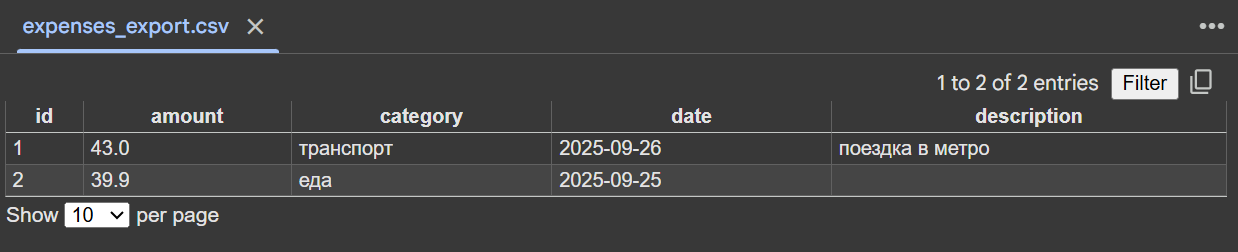

План коммитов:

***init: create project skeleton and README*** — добавлен README, .gitignore, заглушка.

***feat(db): add sqlite schema and init_db()*** — создание таблицы расходов.

***feat(crud): add add_expense and fetch functions*** — добавление/чтение записей.

***feat(ui): implement interactive menu and input validation*** — меню, валидация даты/суммы/категорий.

***feat(export): add CSV export*** — экспорт в CSV.

***chore: add gitignore and docs*** — обновления .gitignore и инструкции.

***fix: error handling and edge cases*** — обработка ошибок, форматирование чисел.

***refactor: separate functions and improve UX*** — небольшие улучшения UX и кода.

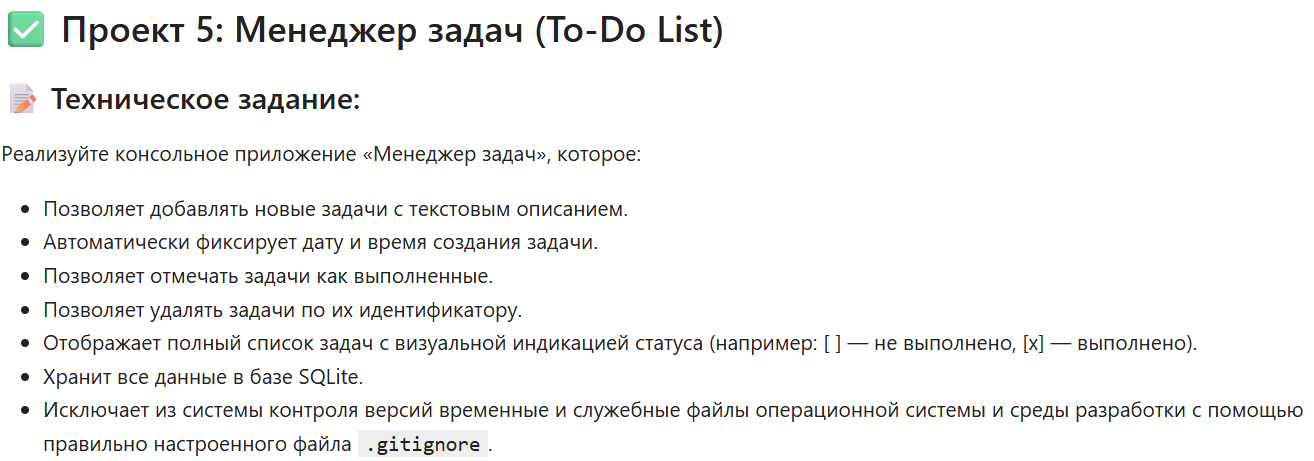

In [6]:
#!/usr/bin/env python3
# todo.py
"""
Менеджер задач (To-Do List) — консольное приложение с SQLite.
Python 3.7+
"""

import sqlite3
from datetime import datetime
import os
from typing import Optional

DB_FILENAME = "tasks.db"


def get_conn(db_path: Optional[str] = None):
    if db_path:
        return sqlite3.connect(db_path)
    return sqlite3.connect(DB_FILENAME)


def init_db(db_path: Optional[str] = None):
    with get_conn(db_path) as conn:
        conn.execute(
            """
            CREATE TABLE IF NOT EXISTS tasks (
                id INTEGER PRIMARY KEY AUTOINCREMENT,
                description TEXT NOT NULL,
                created_at TEXT NOT NULL,
                done INTEGER NOT NULL DEFAULT 0
            )
            """
        )
        conn.commit()


def add_task(description: str, db_path: Optional[str] = None):
    created_at = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    with get_conn(db_path) as conn:
        conn.execute(
            "INSERT INTO tasks (description, created_at, done) VALUES (?, ?, ?)",
            (description, created_at, 0),
        )
        conn.commit()


def mark_done(task_id: int, db_path: Optional[str] = None):
    with get_conn(db_path) as conn:
        cur = conn.execute("UPDATE tasks SET done = 1 WHERE id = ?", (task_id,))
        if cur.rowcount == 0:
            raise ValueError("Задача с таким ID не найдена")
        conn.commit()


def delete_task(task_id: int, db_path: Optional[str] = None):
    with get_conn(db_path) as conn:
        cur = conn.execute("DELETE FROM tasks WHERE id = ?", (task_id,))
        if cur.rowcount == 0:
            raise ValueError("Задача с таким ID не найдена")
        conn.commit()


def fetch_all(db_path: Optional[str] = None):
    with get_conn(db_path) as conn:
        return conn.execute(
            "SELECT id, description, created_at, done FROM tasks ORDER BY id DESC"
        ).fetchall()


def print_tasks(tasks):
    if not tasks:
        print("Список задач пуст.")
        return
    print("\nСписок задач:")
    print("=" * 50)
    for task in tasks:
        id_, desc, created, done = task
        status = "[x]" if done else "[ ]"
        print(f"{id_:<3} {status} {desc} (создана {created})")
    print()


def main_menu():
    print("""
===== Менеджер задач =====
1. Добавить задачу
2. Отметить задачу как выполненную
3. Удалить задачу
4. Показать все задачи
0. Выход
""")


def main(db_path: Optional[str] = None):
    init_db(db_path)
    while True:
        main_menu()
        choice = input("Выберите пункт: ").strip()
        try:
            if choice == "1":
                desc = input("Введите описание задачи: ").strip()
                if desc:
                    add_task(desc, db_path)
                    print("Задача добавлена.")
                else:
                    print("Описание не может быть пустым.")

            elif choice == "2":
                task_id = int(input("Введите ID задачи для отметки: ").strip())
                mark_done(task_id, db_path)
                print("Задача отмечена как выполненная.")

            elif choice == "3":
                task_id = int(input("Введите ID задачи для удаления: ").strip())
                delete_task(task_id, db_path)
                print("Задача удалена.")

            elif choice == "4":
                tasks = fetch_all(db_path)
                print_tasks(tasks)

            elif choice == "0":
                print("Выход.")
                break

            else:
                print("Неверный пункт меню.")
        except Exception as e:
            print("Ошибка:", e)


if __name__ == "__main__":
    main()


===== Менеджер задач =====
1. Добавить задачу
2. Отметить задачу как выполненную
3. Удалить задачу
4. Показать все задачи
0. Выход

Выберите пункт: 1
Введите описание задачи: Решить задачи по питону
Задача добавлена.

===== Менеджер задач =====
1. Добавить задачу
2. Отметить задачу как выполненную
3. Удалить задачу
4. Показать все задачи
0. Выход

Выберите пункт: 2
Введите ID задачи для отметки: 1
Задача отмечена как выполненная.

===== Менеджер задач =====
1. Добавить задачу
2. Отметить задачу как выполненную
3. Удалить задачу
4. Показать все задачи
0. Выход

Выберите пункт: 4

Список задач:
1   [x] Решить задачи по питону (создана 2025-09-26 15:03:37)


===== Менеджер задач =====
1. Добавить задачу
2. Отметить задачу как выполненную
3. Удалить задачу
4. Показать все задачи
0. Выход

Выберите пункт: 1
Введите описание задачи: Отредактировать модули
Задача добавлена.

===== Менеджер задач =====
1. Добавить задачу
2. Отметить задачу как выполненную
3. Удалить задачу
4. Показать все зад

In [ ]:
# Базы данных
*.db
*.sqlite3

# Python
__pycache__/
*.py[cod]
venv/
env/
.env

# Системные файлы
.DS_Store
Thumbs.db

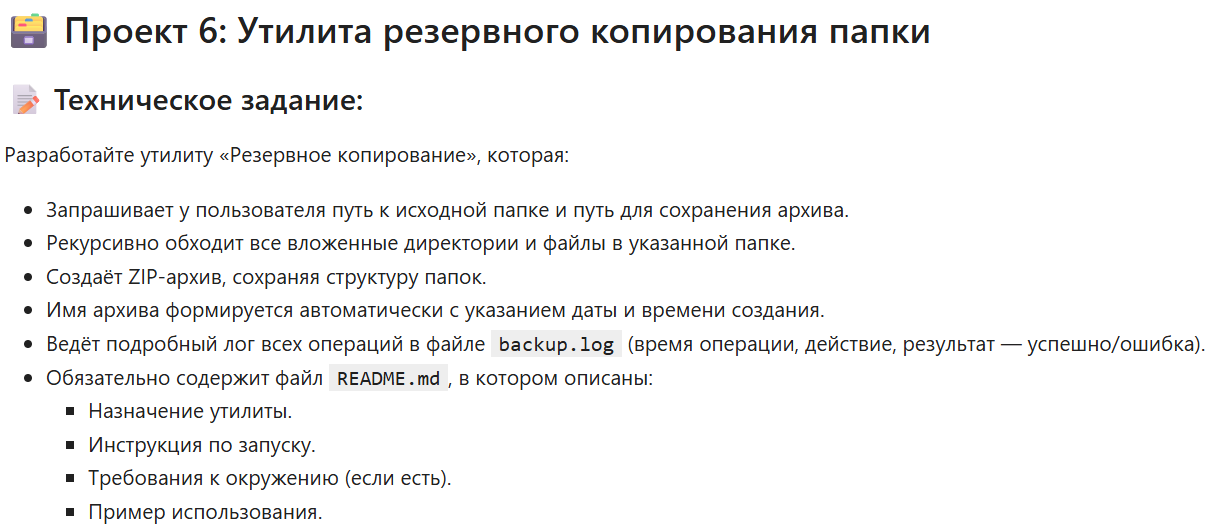

In [7]:
import os
import zipfile
from datetime import datetime
import logging
import sys

# Настройка логирования
logging.basicConfig(
    filename="backup.log",
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
)


def create_backup(src_folder: str, dest_folder: str):
    """Создание ZIP-архива с резервной копией"""

    if not os.path.exists(src_folder):
        logging.error(f"Исходная папка не найдена: {src_folder}")
        raise FileNotFoundError(f"Исходная папка не найдена: {src_folder}")

    if not os.path.exists(dest_folder):
        try:
            os.makedirs(dest_folder, exist_ok=True)
            logging.info(f"Создана папка назначения: {dest_folder}")
        except Exception as e:
            logging.error(f"Ошибка при создании папки назначения: {e}")
            raise

    # Имя архива с датой и временем
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    archive_name = f"backup_{timestamp}.zip"
    archive_path = os.path.join(dest_folder, archive_name)

    try:
        with zipfile.ZipFile(archive_path, "w", zipfile.ZIP_DEFLATED) as zipf:
            for root, dirs, files in os.walk(src_folder):
                for file in files:
                    file_path = os.path.join(root, file)
                    rel_path = os.path.relpath(file_path, src_folder)
                    try:
                        zipf.write(file_path, rel_path)
                        logging.info(f"Добавлен файл: {file_path} → {rel_path}")
                    except Exception as e:
                        logging.error(f"Ошибка при добавлении файла {file_path}: {e}")
        logging.info(f"Архив успешно создан: {archive_path}")
        print(f"✅ Резервная копия создана: {archive_path}")
    except Exception as e:
        logging.error(f"Ошибка при создании архива: {e}")
        print("❌ Ошибка при создании архива:", e)


def main():
    print("=== Утилита резервного копирования ===")
    src = input("Введите путь к исходной папке: ").strip()
    dest = input("Введите путь для сохранения архива: ").strip()
    try:
        create_backup(src, dest)
    except Exception as e:
        print("Ошибка:", e)


if __name__ == "__main__":
    main()


=== Утилита резервного копирования ===
Введите путь к исходной папке: /content/sample_data
Введите путь для сохранения архива: /content
✅ Резервная копия создана: /content/backup_20250926_150915.zip


# Утилита резервного копирования (backup.py)

## 📌 Назначение
Утилита позволяет создавать резервные копии выбранной папки в формате ZIP-архива с сохранением структуры директорий.  
Все действия фиксируются в лог-файле `backup.log`.

## ⚙️ Требования
- Python 3.7+
- Стандартные библиотеки (`os`, `zipfile`, `datetime`, `logging`)

## 🚀 Запуск
1. Скачайте `backup.py`.
2. Запустите утилиту:
   ```bash
   python backup.py